In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Ensemble-Machine-Learning-Cookbook/master/Chapter04/Decision%20Tree/backorders.csv')

In [3]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,117,NaN,0,0,0,0,0,0,15,15,1,No,0,-99.00,-99.00,0,No,No,Yes,Yes,No,No
1,1870557,7,2.0,0,0,0,0,0,0,0,0,0,No,0,0.50,0.28,0,Yes,No,No,Yes,No,No
2,1475481,258,15.0,10,10,77,184,46,132,256,365,47,No,0,0.54,0.70,0,No,No,No,Yes,No,No
3,1758220,46,2.0,0,0,0,0,1,2,6,9,1,No,0,0.75,0.90,0,Yes,No,No,Yes,No,No
4,1360312,2,2.0,0,4,6,10,2,2,5,6,0,No,0,0.97,0.92,0,No,No,No,Yes,No,No


In [4]:
df.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
61584,1397275,6,8.0,0,24,24,24,0,7,9,12,1,No,0,0.98,0.98,0,No,No,No,Yes,No,No
61585,3072139,130,2.0,0,40,80,140,18,108,230,317,34,No,0,0.51,0.28,0,No,No,No,Yes,No,No
61586,1909363,135,9.0,0,0,0,0,10,40,65,89,2,No,0,1.00,0.99,0,No,No,Yes,Yes,No,No
61587,1845783,63,NaN,0,0,0,0,452,1715,3425,4864,542,No,0,-99.00,-99.00,1,No,No,No,No,No,Yes
61588,1200539,0,2.0,0,8,8,8,0,1,1,1,0,No,0,0.79,0.78,0,Yes,No,No,Yes,No,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61589 entries, 0 to 61588
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sku                61589 non-null  int64  
 1   national_inv       61589 non-null  int64  
 2   lead_time          58186 non-null  float64
 3   in_transit_qty     61589 non-null  int64  
 4   forecast_3_month   61589 non-null  int64  
 5   forecast_6_month   61589 non-null  int64  
 6   forecast_9_month   61589 non-null  int64  
 7   sales_1_month      61589 non-null  int64  
 8   sales_3_month      61589 non-null  int64  
 9   sales_6_month      61589 non-null  int64  
 10  sales_9_month      61589 non-null  int64  
 11  min_bank           61589 non-null  int64  
 12  potential_issue    61589 non-null  object 
 13  pieces_past_due    61589 non-null  int64  
 14  perf_6_month_avg   61589 non-null  float64
 15  perf_12_month_avg  61589 non-null  float64
 16  local_bo_qty       615

### Data Preparation

In [6]:
df = df.drop(['sku'], axis=1)
df = df.dropna(axis=0) # only 5% nan

Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

In [14]:
cat_cols = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object']]
for col in cat_cols:
    labelEncoder = LabelEncoder()
    df[col] = labelEncoder.fit_transform(df[col])

In [15]:
df.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1,7,2.0,0,0,0,0,0,0,0,0,0,0,0,0.50,0.28,0,1,0,0,1,0,0
2,258,15.0,10,10,77,184,46,132,256,365,47,0,0,0.54,0.70,0,0,0,0,1,0,0
3,46,2.0,0,0,0,0,1,2,6,9,1,0,0,0.75,0.90,0,1,0,0,1,0,0
4,2,2.0,0,4,6,10,2,2,5,6,0,0,0,0.97,0.92,0,0,0,0,1,0,0
5,297,12.0,0,0,0,0,5,6,44,57,3,0,0,0.58,0.75,0,1,0,0,1,0,0


In [20]:
X = df.drop(['went_on_backorder'], axis=1).values
y = df['went_on_backorder'].values

Train / Test Split Data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

### Model Train and Evaluation

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
def plot_cm(y_test, y_pred):
    plt.figure(figsize=(16, 8))
    sns.heatmap(confusion_matrix(y_test, y_pred), linewidths=0.5, annot=True)
    plt.show()

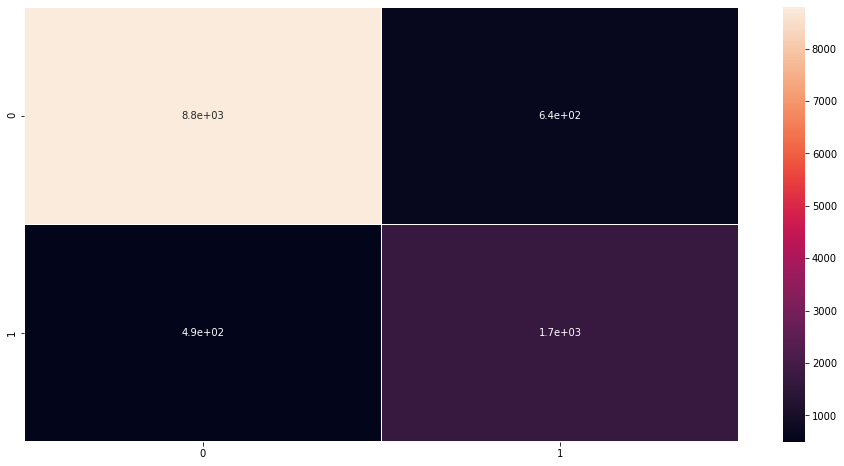

In [27]:
plot_cm(y_test, y_pred)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      9439
           1       0.73      0.78      0.75      2199

    accuracy                           0.90     11638
   macro avg       0.84      0.85      0.84     11638
weighted avg       0.91      0.90      0.90     11638



### Model Train and Evaluation Using Hyperparameter Tuning

GridSearchCV

Parameters
* criterion : string, optional (default=”gini”)

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

* min_samples_split : int, float, optional (default=2)

The minimum number of samples required to split an internal node.

* max_depth : int or None, optional (default=None)

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

* min_samples_leaf : int, float, optional (default=1)

The minimum number of samples required to be at a leaf node.

* max_leaf_nodes : int or None, optional (default=None)

Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

In [37]:
grid_search_parameters = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 3, 4],
    'max_depth': [None, 2, 3, 4],
    'min_samples_leaf': [1, 3, 5],
    'max_leaf_nodes': [None]
}

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
clf = DecisionTreeClassifier()

model = GridSearchCV(clf, grid_search_parameters, cv=5)
model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [40]:
model.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [41]:
y_pred = model.predict(X_test)

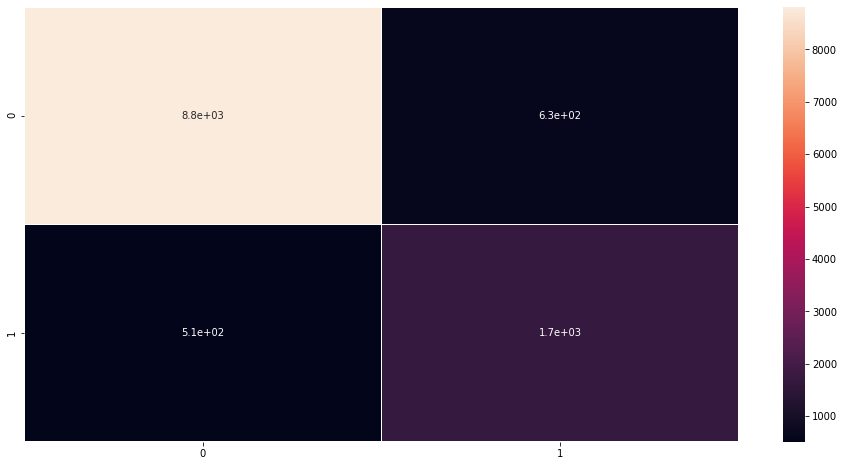

In [42]:
plot_cm(y_test, y_pred)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      9439
           1       0.73      0.77      0.75      2199

    accuracy                           0.90     11638
   macro avg       0.84      0.85      0.84     11638
weighted avg       0.90      0.90      0.90     11638

